<a href="https://colab.research.google.com/github/jfcoderx/Data-Sciense/blob/main/04_Displot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Distrubition - Taqsimot

Taqsimot grafigi - o'zgaruvchi (ustun) da qanday qiymatlar mavjudligi,<br>
qanday taqsimlanganligi va ularning ehtimolligini korsatadi

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/merc.csv")
df = df[df.year >= 2010] # 2010-yildan keyin chiqqan mashinalarni saqlab qolamiz
df = df[df.transmission != "Other"] # faqat avtomat, yarim-avtomat, va mexanik mashinalarni saqlab qolamiz
df = df[df.fuelType != "Other"] # faqat benzin, dizel, va gibrid mashinalarni saqlab qolamiz

df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


Jadvalimizda narxlar qanday taqsimlangan shuni koraylik:

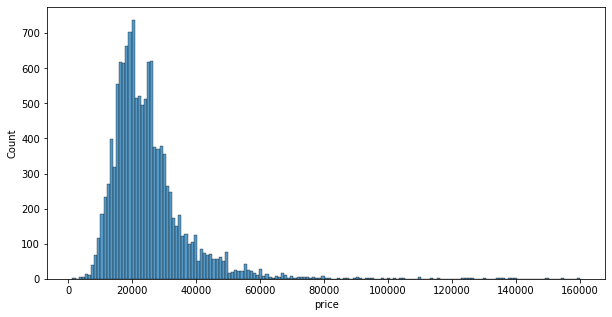

In [3]:
plt.figure(figsize = (10, 5))

sns.histplot(data = df, x = 'price') # hist - histogram

plt.show()

Bu grafigimizdan xulosa olsak: Bizdagi aksar mashinalar 20ming atrofida ekan,<br> 60mingdan qimmat mashinalar judayam kamchilikni tashkil qilar ekan

Hisplotni ham ichiga ovoradigan funksiya bu distplot:

<Figure size 720x360 with 0 Axes>

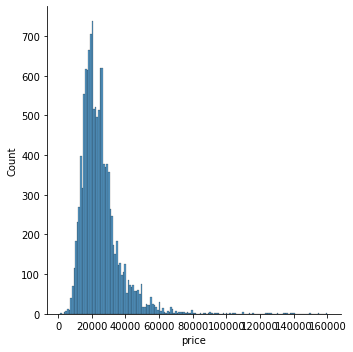

In [4]:
plt.figure(figsize = (10, 5))

sns.displot(data = df, x = 'price') # dis - distrubution

plt.show()

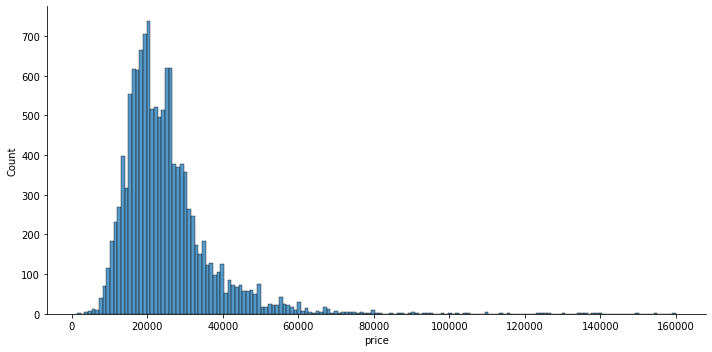

In [5]:
# plt.figure(figsize = (10, 5)) - displotda bu ishlamaydi

sns.displot(data = df, x = 'price', height = 5, aspect = 2) 
# balandligi 5, aspect 2, eni ikki baravar katta bolsin, yani 10

plt.show()

histplot va displot ikkalasi ham bir narsa chizdi, ammo <br>displotni avzalliklaridan biri, hue parameter qoshsak boladi:

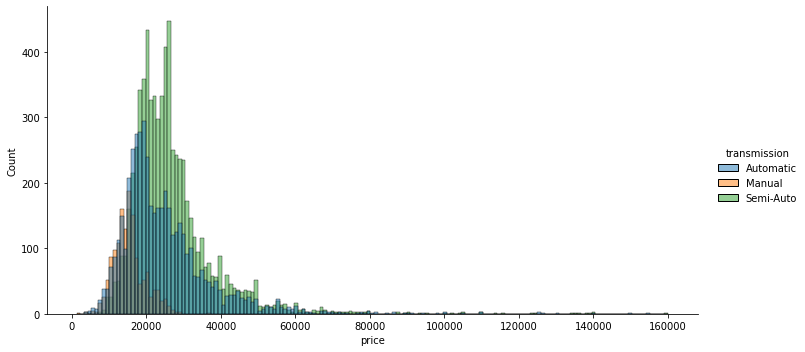

In [6]:
sns.displot(data = df, x = 'price', hue='transmission', height = 5, aspect = 2)

plt.show()

Demak yarim avtomat mashinalar soni koproq ekan va qimmatroqlari ham borakan<br>
mexaniklarni narxi ham kamroq, soni ham kamroqligini korishimiz mumkin ekan

multiple bilan rangini yanada ajratiladigan qilishimiz mumkin

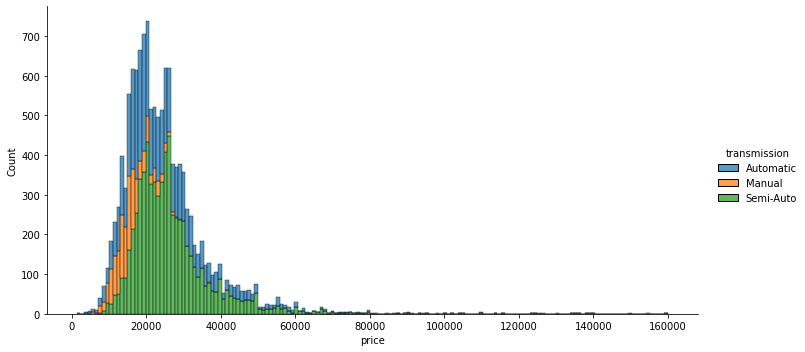

In [7]:
sns.displot(data = df, x = 'price', hue='transmission', multiple = 'stack', height = 5, aspect = 2)

plt.show()

Biz transmissionni 3 chalisini bitta grafikka chizyapmiz<br>

col parametri orqali 3chalasini ham ajratib chizishimiz mumkin:

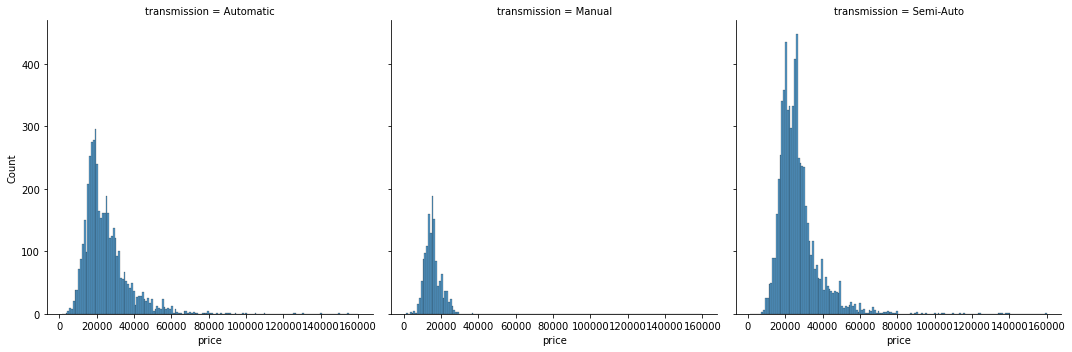

In [8]:
sns.displot(data = df, x = 'price', col='transmission', height = 5)

plt.show()

Korish mumkinki, avtomat mashinalarning soni 60mingdan keyin juda kam ekan<br>
mexaniklarniki esa 40minggacha ham bormas ekan, yarim avtomatlarni 20-40ming <br>atrofidagi narxda soni ham kop ekan.

<br>

### Taqsimot. KDE

KDE - Kernel Density Estimation

Qiymatlar taqsimotini baholashning yana bir usuli bu - KDE,<br> tasodifiy qiymatlar zichligini ko'rsatuvchi grafik. KDE haqida to'liq ma'lumot:<br>
 https://en.wikipedia.org/wiki/Kernel_density_estimation (rus tilida ham bor)

displotga turli paramaterlar kiritib uning taqsimotini korinishini ham turlicha qilsa boladi

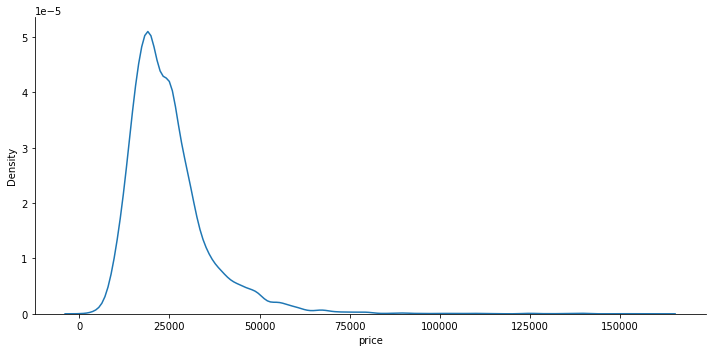

In [9]:
sns.displot(data=df, x='price', kind='kde', height=5, aspect=2)
plt.show()

Yuqoridagi histogramlarning bir chiziqli korinishini chizib korsatyapti

Ham gistogramma ham kdeni birga chizishimiz mumkin

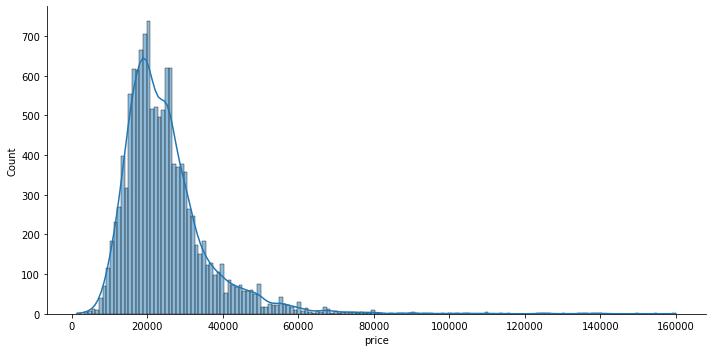

In [10]:
sns.displot(data = df, x = 'price', kde=True, height = 5, aspect = 2)

plt.show()

kdeni alohida ozini chizadigan funksiya ham bor

displotni ichida kop grafig chizadiganlar bor

kdeplot ni ozi kdeni chizgani uchun oziga xos<br> 
kop parameterlardan foydalansa boladi

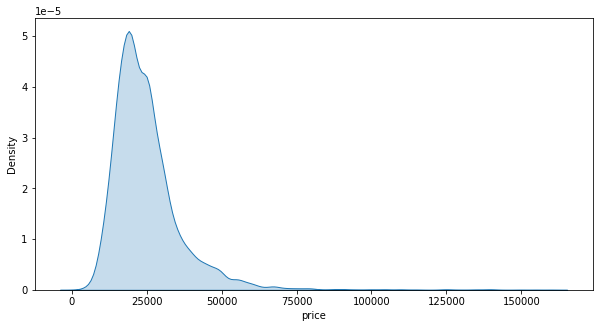

In [13]:
plt.figure(figsize = (10, 5))

sns.kdeplot(data = df, x = 'price', shade=True)

plt.show()

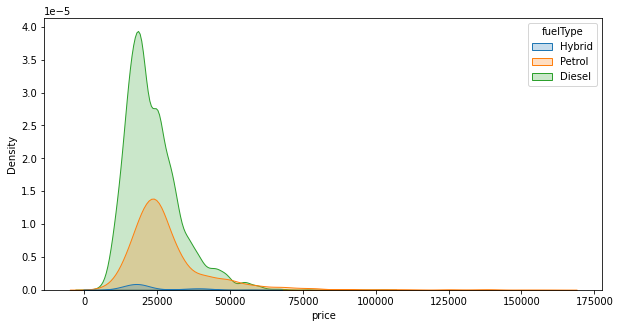

In [15]:
plt.figure(figsize = (10, 5))

sns.kdeplot(data = df, x = 'price', hue='fuelType', shade=True)

plt.show()

xuddi shu narsani displotda qilsak:

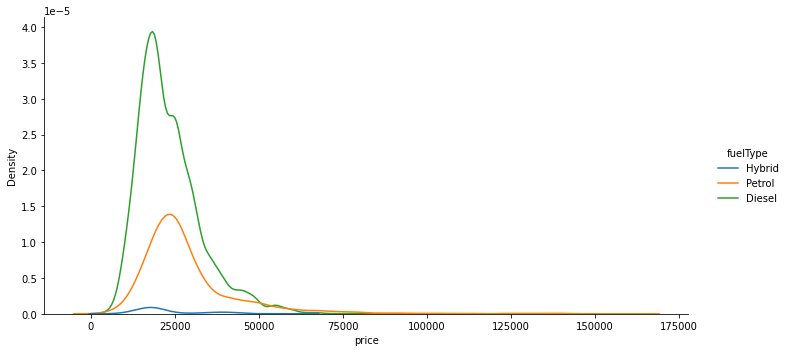

In [16]:
sns.displot(data=df, x='price', hue='fuelType', kind='kde', height=5, aspect=2)

plt.show()

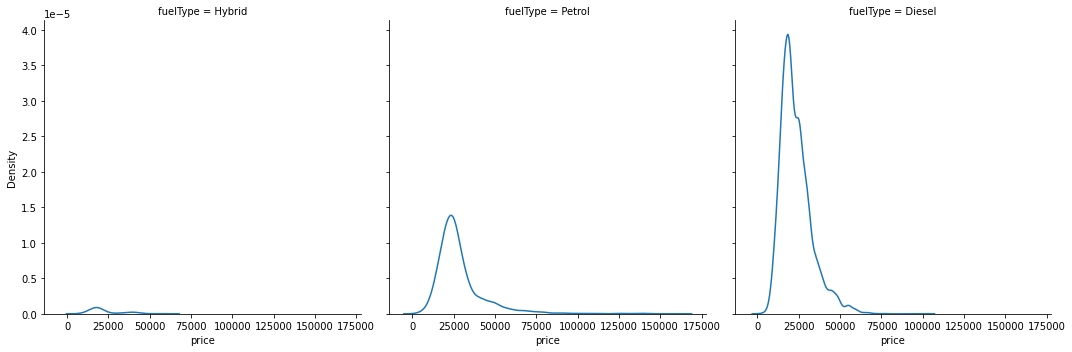

In [25]:
sns.displot(data=df, x="price", col="fuelType", kind='kde', height=5, aspect=1)
plt.show()

### Ikki o'lchamli (2D) KDE

In [26]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2


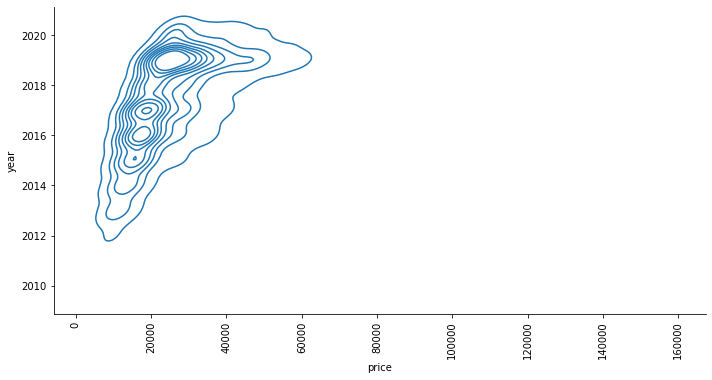

In [27]:
sns.displot(data=df, x="price", y="year", kind="kde", height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

<br>

### CDF - Taqsimot

CDF - cumulative distribution function

Kumulyativ taqsimot funksiyasi - berilgan qiymatning ehtimolligini ko'rsatuvchi parametr.

To'liq: https://en.wikipedia.org/wiki/Cumulative_distribution_function

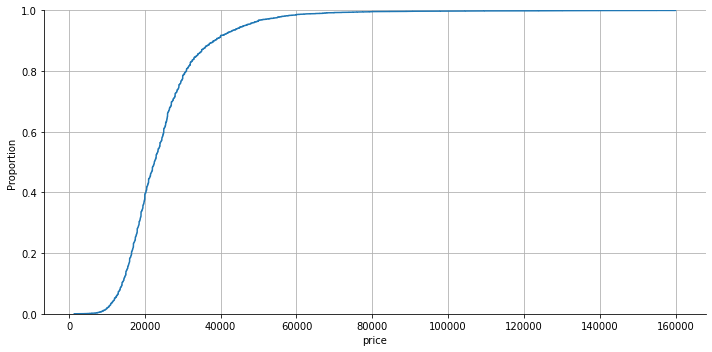

In [22]:
sns.displot(data=df, x='price', kind='ecdf', height=5, aspect=2)

plt.grid(which='both')

plt.show()

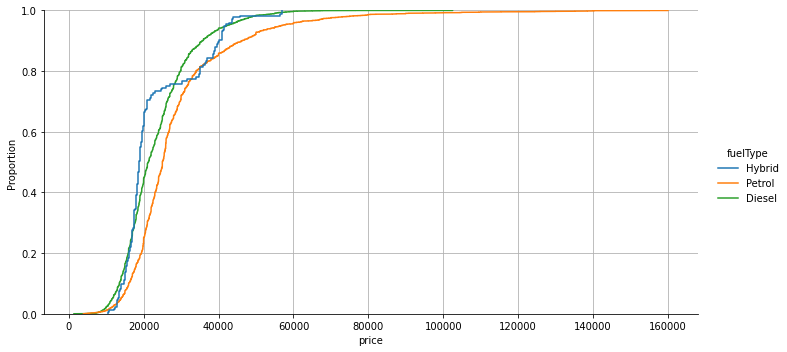

In [24]:
sns.displot(data=df, x='price', hue='fuelType', kind='ecdf', height=5, aspect=2)

plt.grid(which='both')

plt.show()

displot haqida batafsil: https://seaborn.pydata.org/generated/seaborn.displot.html